In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score


In [4]:
data = pd.read_csv('HR_Employee_Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
print("shape of dataset:",data.shape)

shape of dataset: (1470, 35)


In [7]:
print("\ndatatypes:\n",data.dtypes)


datatypes:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [8]:
print("\nmissing values:\n",data.isnull().sum())


missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [9]:
print("\nsummary statistics:\n",data.describe())


summary statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Drop Unnecessary Columns
data.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1,inplace=True)

In [13]:
#Encode the Target Column
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [14]:
#Label Encoding Binary Categorical Features
le = LabelEncoder()
binary_cols=['Gender','OverTime','MaritalStatus']

for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [15]:
#One-Hot Encoding for Multi-Class Categorical Columns
data=pd.get_dummies(data,columns=['BusinessTravel','Department','EducationField','JobRole'],drop_first=True)

In [16]:
#Feature Scaling for Numeric Columns

scaler = StandardScaler()
numeric_col = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
               'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                'YearsSinceLastPromotion', 'YearsWithCurrManager']
data[numeric_col] = scaler.fit_transform(data[numeric_col])

In [17]:
#Train-Test Split
x=data.drop('Attrition',axis=1)
y=data['Attrition']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
# X_train, X_test, y_train, y_test already defined earlier (without SMOTE)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Initialize and train

model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Evaluate

print("LogisticRegression performance without SMOTE:")
print("\nconfusionmatrix:\n",confusion_matrix(y_test,y_pred))
print("\naccuracyscore:\n",accuracy_score(y_test,y_pred))
print("\nclassificationreport:\n",classification_report(y_test,y_pred))

LogisticRegression performance without SMOTE:

confusionmatrix:
 [[239   8]
 [ 31  16]]

accuracyscore:
 0.8673469387755102

classificationreport:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       247
           1       0.67      0.34      0.45        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



In [19]:
#Apply SMOTE on the training set

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)# Apply to training data only (not test!)

# Check class distribution after SMOTE
print("After SMOTE, target counts:", y_train_sm.value_counts())

After SMOTE, target counts: Attrition
0    986
1    986
Name: count, dtype: int64


In [20]:
#Train Logistic Regression on SMOTE data
from sklearn.linear_model import LogisticRegression

Logistic_model= LogisticRegression(max_iter=1000)
Logistic_model.fit(x_train_sm,y_train_sm)

LogisticRegression(max_iter=1000)

In [22]:
#Predict and evaluate
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## Predict on original (unchanged) test set
y_pred_sm = Logistic_model.predict(x_test)

#Evaluate
print("LogisticRegression performance with SMOTE:")
print("\nconfusionmatrix:\n",confusion_matrix(y_test,y_pred_sm))
print("\naccuracyscore:\n",accuracy_score(y_test,y_pred_sm))
print("\nclassificationreport:\n",classification_report(y_test,y_pred_sm))


LogisticRegression performance with SMOTE:

confusionmatrix:
 [[230  17]
 [ 26  21]]

accuracyscore:
 0.8537414965986394

classificationreport:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       247
           1       0.55      0.45      0.49        47

    accuracy                           0.85       294
   macro avg       0.73      0.69      0.70       294
weighted avg       0.84      0.85      0.85       294



In [ ]:
#next try to another model (Decisiontree classifier)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_sm,y_train_sm)

y_pred_dt = dt_model.predict(x_test)

print("\naccuracyscore:\n",accuracy_score(y_test,y_pred_dt))
print("\nclassificationreport:\n",classification_report(y_test,y_pred_dt))
print("\nconfusionmatrix:\n",confusion_matrix(y_test,y_pred_dt))


accuracyscore:
 0.7278911564625851

classificationreport:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       247
           1       0.23      0.30      0.26        47

    accuracy                           0.73       294
   macro avg       0.54      0.55      0.55       294
weighted avg       0.76      0.73      0.74       294


confusionmatrix:
 [[200  47]
 [ 33  14]]


In [ ]:
#next model random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_sm,y_train_sm)

y_pred_rf =rf_model.predict(x_test)

print("\naccuracyscore:\n",accuracy_score(y_test,y_pred_rf))
print("\nclassificationreport:\n",classification_report(y_test,y_pred_rf))
print("\nconfusionmatrix:\n",confusion_matrix(y_test,y_pred_rf))


accuracyscore:
 0.8333333333333334

classificationreport:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.46      0.23      0.31        47

    accuracy                           0.83       294
   macro avg       0.66      0.59      0.61       294
weighted avg       0.80      0.83      0.81       294


confusionmatrix:
 [[234  13]
 [ 36  11]]


                 Feature  Importance
18      StockOptionLevel    0.066630
25  YearsWithCurrManager    0.053436
22        YearsAtCompany    0.047465
0                    Age    0.046633
19     TotalWorkingYears    0.044870
11         MonthlyIncome    0.044453
13    NumCompaniesWorked    0.040063
8               JobLevel    0.039975
2       DistanceFromHome    0.037846
23    YearsInCurrentRole    0.037621


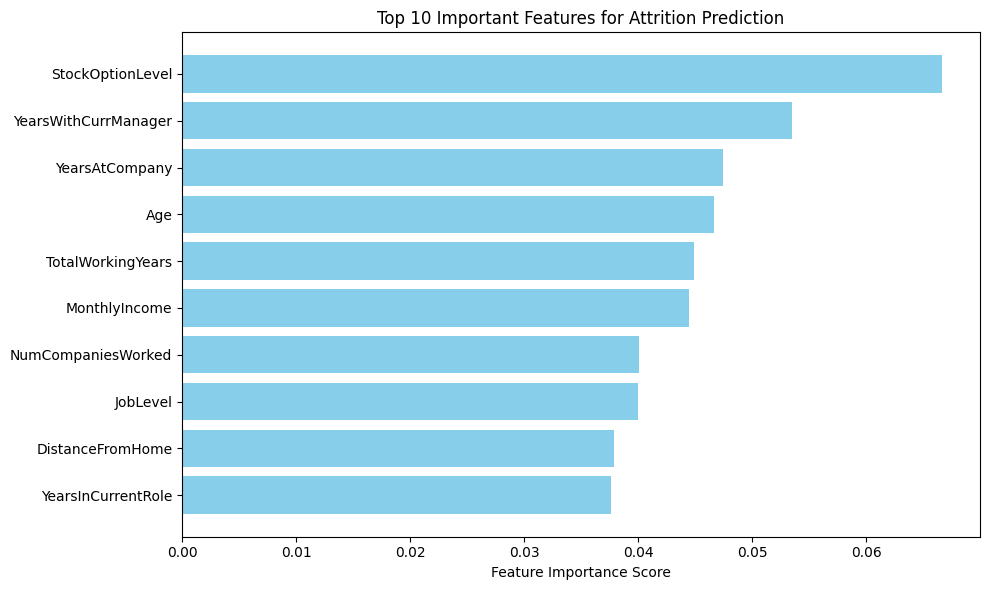

In [ ]:
#Feature Importance (with Plot)

import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest model
importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance_df.head(10))

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features for Attrition Prediction')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()


In [23]:
import joblib

# Save your trained model
joblib.dump(Logistic_model, 'Logistic_model.pkl')

['Logistic_model.pkl']